# Exercise worksheet no 1

# An introduction to Python using global warming data

*Machine learning in climate and environmental sciences, winter semester 2024, Jun.-Prof. Peer Nowack, peer.nowack@kit.edu*

*Chair for AI in Climate and Environmental Sciences, https://ki-klima.iti.kit.edu*

**Learning goals:** This first notebook will make you familiar with the Jupyter environment, 
and introduces a few key Python packages such as ``numpy``, ``pandas``, ``netCDF4``, `xarray`, ``matplotlib``, and ``scikit-learn``.

For this, you will consider one of the most prominent examples of evidence for climate change: global warming.

## Python and Jupyter fundamentals
If you are not familiar with Python and Jupyter yet, you might want to learn more about Python
and its basic syntax. There are a lof of free and well-written tutorials
 online, including:

* http://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
* https://www.learnpython.org/
* https://www.w3schools.com/python/
* https://automatetheboringstuff.com/
* https://codeacademy.com/catalog/language/python

## Load Python and the "ML-climate" kernel

If you are working on your own computer, now select the Tab "Kernel" above, and then select from the drop-down menu the entry "Change Kernel" and select "ML-climate". This option should exist for you if you followed the Anaconda3 and subsequent installation instructions provided on Ilias.

You will now still miss a few Python packages needed for this exercise. On your own computer you can install these from within Jupyter using the `conda install` lines below. You won't need these in future executions of this notebook, so you can comment out these lines after their first successful execution. In the future, you can instead immediately select the ML-climate kernel.

However, if you work on [Google Colab](https://colab.research.google.com/), comment out cell [2] below and uncomment the next one, which additionally installs the `netCDF4` package on your Colab account. 

In [134]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [135]:
### you can comment out these lines with "#" after you have run this Jupyter notebook for the first time
### In later exercises, you might need to install additional packages to the ML-climate kernel/Conda environment, 
### using similar commands
### This is generally a method to install Python packages directly from within Jupyter notebooks. 
### The packages will be added to the environment set as kernel.
### Executing this cell might take a while and will create a long output. 
### You can easily collapse that output, by clicking with your mouse left of the output cell.
#!conda install -c conda-forge nbgrader -y
#!conda install numpy -y
#!conda install pandas -y
#!conda install scipy -y
#!conda install matplotlib -y
#!conda install netcdf4 -y
#!conda install xarray -y
#!conda install -c conda-forge cartopy -y
#!conda install scikit-learn -y

In [136]:
# As described in the Python tutorials above, we first need to load the required Python packages, 
# some of which we have just installed
import os
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import netCDF4
import xarray as xr
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Global warming

- In this exercise, you will first load and visualize the historical global warming signal using `matplotlib` (Task 1).
- Using historical changes in potential drivers of global temperature fluctuations and trends, you will then try to explain the signal with regression models. You will also explore the potential and limitations of a couple of first basic machine learning models (Task 2).

## Task 1: Download and visualize global warming data

#### Background

There are a many different data sources that climate scientists use to reconstruct Earth's surface temperature history. Why do we need to specify "surface"? That's because scientists are also interested in temperatures higher up in the atmosphere, whereas in this exercise we will focus on temperatures at the ground, where we live.

Temperature measurements have been taken in a variety of ways as technology progressed, which has led to an increasing density and quality of data over time. For example, direct and indirect sources of information include [meteorological station measurements](https://cp.copernicus.org/articles/15/1345/2019/), [ice core](https://www.bas.ac.uk/data/our-data/publication/ice-cores-and-climate-change/), [tree ring](https://climate.nasa.gov/news/2540/tree-rings-provide-snapshots-of-earths-past-climate/#:~:text=The%20color%20and%20width%20of,year%20of%20the%20tree's%20life.), and [sediment](https://niwa.co.nz/climate/faq/how-do-we-determine-past-climate) data. Data sources for the modern climate record in particular include measurements by [ground-based remote sensing](https://www.imk-asf.kit.edu/english/201.php), [ships](https://www2.physics.ox.ac.uk/collaborations/osmosis/how-can-we-observe-these-flows-in-the-ocean), [profiling floats](https://www.aoml.noaa.gov/argo/), [weather balloons](https://www.imk-asf.kit.edu/english/ffb.php), and [aircraft measurements](https://www.imk-asf.kit.edu/english/1443.php). Since the late 1970s, [satellite measurements](https://climate.nasa.gov/faq/49/which-measurement-is-more-accurate-taking-earths-surface-temperature-from-the-ground-or-from-space/) have become central, although they do come with their own challenges. In the end, a variety of sources are typically combined to provide the most reliable estimates of Earth's temperature record.

In this exercise, we will look at a surface temperature data product provided by [NASA](https://climate.nasa.gov/vital-signs/global-temperature/), which we can download using Python's ``requests`` package. We here define another function ``fetch_data()`` that builds on ``requests``, and we will use this function repeatedly.

Update for WS24: we continue defining the function here, but have downloaded the data for you into the folder ``data`` provided with this exercise, because the function caused a few issues depending on the operating system last year. Still, feel free to explore the commented out code in the cells below to directly fetch the most recent data yourself.

In [137]:
def fetch_data(url,fname):
    file = fname
    if not os.path.exists(file):
        print("Downloading data ...")
        with open(file, "wb") as f:
            f.write(requests.get(url).content)
        print("Download data complete.")
    return file

In [138]:
### this might take a minute
# data_url = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
# data_file = "./data/nasa.txt"
# nasa_file = fetch_data(data_url,data_file)

The file is in text format. To load and later process the data, we can use the data library ``pandas``.

Using ``pandas``returns the ``DataFrame`` object, which gives access to many highly optimized data processing, analysis, and visualization routines.

We print the first five rows of the ``DataFrame`` with ``.head()``.

Feel free to experiment what happens if you change the options in the `.read_csv()` reader function and maybe also have a look at the original txt file, which should have been downloaded to your exercise folder.

In [139]:
# nasa = pd.read_csv(nasa_file, header=3, sep='\s+', names=["Year", "T", "T-smoothed"])
nasa = pd.read_csv('./data/nasa.txt', header=3, sep='\s+', names=["Year", "T", "T-smoothed"])
nasa.head(10)

,Year,T,T-smoothed
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.21
4,1884,-0.29,-0.24
5,1885,-0.34,-0.27
6,1886,-0.32,-0.28
7,1887,-0.37,-0.28
8,1888,-0.18,-0.27
9,1889,-0.11,-0.26


The ``DataFrame`` object allows access via index and columns.
Basic Python operators ``[]`` and ``.`` are supported.

In [140]:
print('Index test: ', nasa.index[3],"\n")
print('Access by index example:', nasa.iloc[3],sep="\n")
print()
print('Access by column names with list:',nasa[['Year','T']].head(),sep="\n")
print()
print('Access by column name:',nasa['T-smoothed'].head(),sep="\n")

Index test:  3 

Access by index example:
Year          1883.00
T               -0.18
T-smoothed      -0.21
Name: 3, dtype: float64

Access by column names with list:
   Year     T
0  1880 -0.17
1  1881 -0.09
2  1882 -0.11
3  1883 -0.18
4  1884 -0.29

Access by column name:
0   -0.10
1   -0.13
2   -0.17
3   -0.21
4   -0.24
Name: T-smoothed, dtype: float64


### First visualization (matplotlib, pandas)
Next we visualize the temperature data from NASA using ``matplotlib``, a [package for data visualization](https://matplotlib.org/stable/tutorials/index) in Python. You can find a quick tutorial [here](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

As can be inferred from the first dimension ``'Year'`` in the ``DataFrame`` object, combined with the info on the [NASA website](https://climate.nasa.gov/vital-signs/global-temperature/), 
the column ``T`` provides annually and globally averaged temperatures across the years 1880 to 2023 at Earth's surface, relative to the 1951-1980 temperature average.

To begin with, we will plot both the annual mean and smoothed data (an approx. 5-year rolling average) provided, just as on the NASA website itself. The rolling average is helpful to smooth out 
short-term variability to make underlying long-term trends more visible (cf. climate change), as you will see after evaluating the next cell.

Now it's time for you to answer the first questions. Wherever possible, built-in functionality of libraries such as `numpy` and `pandas` should be preferred over Python statements as these libraries are heavily optimized and run much faster than raw Python code in general.

**Task 1.1** Calculate a 20-year centred rolling-mean version of the NASA data and then add this smoothed data as another line to the figure object implemented in the cell below. Show the new line in blue colour.
You might want to use the ``.rolling()`` and ``.mean()`` functions of ``pandas``.

*Hint*: use Google search and the [`pandas` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) if you want to find more guidance on these functions.

**Task 1.2** What is the resulting 20-year centred rolling-mean value in year 2010? Pass this value to the `rm_value_2010`variable below.

*Note*: some of your answers in this notebook will be autograded, others will be manually graded after submission. Some of the `assert()` statements at the very end of this notebook may help you find out if your answer might be wrong or missing, but there will be additional hidden tests that will be carried out on your submitted notebook (after upload to Ilias).

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10   -0.2295
11   -0.2250
12   -0.2285
13   -0.2370
14   -0.2465
15   -0.2560
16   -0.2520
17   -0.2475
18   -0.2485
19   -0.2610
Name: T, dtype: float64

124    0.5500
125    0.5715
126    0.5940
127    0.6280
128    0.6510
129    0.6635
130    0.6930
131    0.7240
132    0.7395
133    0.7530
134    0.7810
135       NaN
136       NaN
137       NaN
138       NaN
139       NaN
140       NaN
141       NaN
142       NaN
143       NaN
Name: T, dtype: float64

##################################################
<class 'pandas.core.series.Series'>
RangeIndex: 144 entries, 0 to 143
Series name: Year
Non-Null Count  Dtype
--------------  -----
144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB
##################################################
<class 'pandas.core.series.Series'>
RangeIndex: 144 entries, 0 to 143
Series name: T
Non-Null Count  Dtype  
--------------  -----  
125 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB
##################################################
0.693


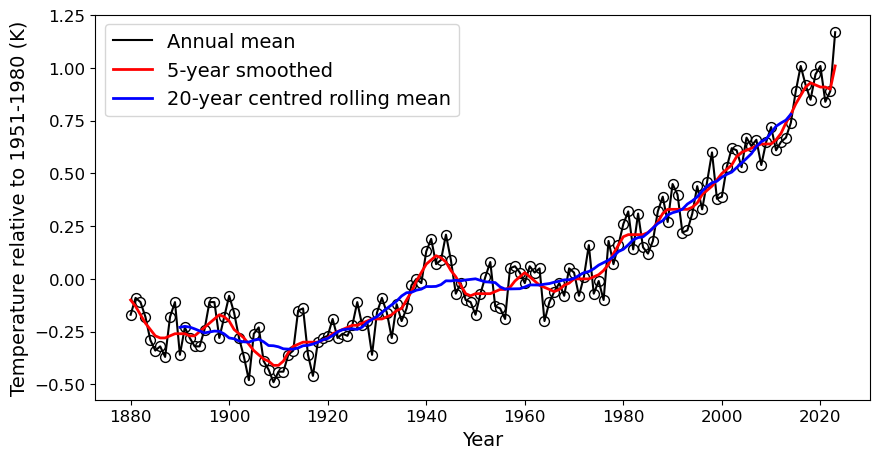

In [141]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(nasa['Year'],nasa['T'],s=50,color='white',marker=None,edgecolors='k')
ax.plot(nasa['Year'],nasa['T'],label='Annual mean',color='k')
ax.plot(nasa['Year'],nasa['T-smoothed'],label='5-year smoothed',color='r',linewidth=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel('Temperature relative to 1951-1980 (K)',size=14)
ax.set_xlabel('Year',size=14)
plt.legend(loc='upper left',fontsize=14)

N=20
time_series_20year_rm = None
rm_value_2010 = None

### YOUR CODE HERE
# Calculate rolling mean
time_series_20year_rm = nasa['T'].rolling(window=N,center=True).mean()
# Check for expected NaN Values (10 at beginning and 9 at end because centered 20)
display(time_series_20year_rm.iloc[:20])
display(time_series_20year_rm.iloc[-20:])
# Plot
ax.plot(nasa['Year'],time_series_20year_rm,label='20-year centred rolling mean',color='b',linewidth=2)
# Check shape
print("#"*50)
nasa.Year.info()
print("#"*50)
time_series_20year_rm.info()
print("#"*50)
# Same Index --> check index of year 2010
rm_value_2010 = time_series_20year_rm[nasa[nasa.Year == 2010].index[0]]
print(rm_value_2010)
###

plt.legend(loc='upper left',fontsize=14)
plt.show()

**Task 1.3** Why is no 20-year centred rolling mean value calculated for e.g. the year 2019?

In [142]:
answer_rolling_mean = ''
# YOUR ANSWER HERE
answer_rolling_mean = "Because the rolling mean is centred, the first 10 and last 9 years of the time series do not have enough data points from the past or ahead to calculate a 20-year centred rolling mean (See displayed numbers in last cell output). The first 10 years of the time series are missing 10 years of data points at the beginning, and the last 9 years of the time series are missing 9 years of data points at the end. Explanation on given example: Calculating the 20 year mean of year 2019 would require data from 10 years before (up to 2009) and 10 years ahead including the current year (up to 2028), in sum 20 years, which is not available in the given time series (1880-2023). Hence also the given NaN values in the output above."

### Adding higher frequency data to the visualization (netCDF4)

The data you visualized so far was annual mean data. However, in reality we are often interested in higher-frequency temperature variability, for example on a monthly basis. Typically, higher temporal resolution means that you also see a larger range of values and more weather "noise".

To illustrate this, we have prepared another version of the NASA dataset, which provides monthly-mean data in the `netCDF` file format. 

The `NetCDF` format is one of the standard file formats in climate science (file ending `.nc`). The format allows for easy structuring of typical dimensions of climate data (in particular: time, latitude, longitude, altitude), see also this [tutorial](https://colab.research.google.com/github/astg606/py_materials/blob/master/science_data_format/introduction_netcdf4.ipynb). Since we here look at global mean surface temperature data again, this means that only the time dimension is expanded/active (because there is no need to represent longitudes, latitudes, or various altitudes - just one time series stretched out over all months from 1880 onwards). However, you will encounter regional data gridded by latitude and longitude in Worksheet 2.

Now, let's first load the monthly data and print the variables contained in the file - these are *time*, *lat*, *lon*, and *tempanomaly*. They are printed  together with other information, such as their shape and data type.


In [143]:
nasa_mm_file = netCDF4.Dataset('./data/gistemp1200_GHCNv4_ERSSTv5_fldmean.nc')
nasa_mm_file.variables
### On Google Colab: comment out the two lines above and instead uncomment and execute the following:
# from google.colab import files
# uploaded = files.upload() ### in the pop-up window "Choose Files" the .nc file from the /data/ directory in your exercise folder
# nasa_mm_file = netCDF4.Dataset('./data/gistemp1200_GHCNv4_ERSSTv5_fldmean.nc')
# nasa_mm_file.variables

{'time': <class 'netCDF4.Variable'>
 int32 time(time)
     standard_name: time
     long_name: time
     bounds: time_bnds
     units: days since 1800-01-01 00:00:00
     calendar: standard
     axis: T
 unlimited dimensions: time
 current shape = (1736,)
 filling on, default _FillValue of -2147483647 used,
 'time_bnds': <class 'netCDF4.Variable'>
 float64 time_bnds(time, bnds)
 unlimited dimensions: time
 current shape = (1736, 2)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4.Variable'>
 float64 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4.Variable'>
 float64 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e

The `netCDF4` package can handle both netCDF4 and the older version netCDF3 data. 

You can extract data again using the Python operator `[]` combined with variable names in string format.

Let's extract the variable `tempanomaly` which is the same as in the global dataset, just now at higher temporal resolution. This is the quantity we want to plot. As implied by the output above, this variable has a shape of (1725, 1, 1) where the latter two dimensions are pseudo-dimensions, which we can remove with the Python indexing [:,0,0].

In [144]:
nasa_mm = nasa_mm_file['tempanomaly'][:,0,0]
print(nasa_mm.shape)

(1736,)


#### Time dimension

Since this monthly dataset is read in from a `netCDF` file, there is not a table-like dataframe format as in `pandas`. Instead, there is an extra variable `time` that we can access.

At first, the time dimension can be confusing. Printing the variable info reveals a rather strange range of values [29233, ...] which can be explained by their unit "days since 1800-01-01".

In [145]:
time_nc = nasa_mm_file['time'][:]
print(nasa_mm_file['time'].units)
print('Time in original format:\n',time_nc)

days since 1800-01-01 00:00:00
Time in original format:
 [29233 29264 29293 ... 81980 82010 82041]


Therefore, it is always good to know in advance which time range and temporal averaging you expect for a given dataset. You can use the `netCDF4.num2date()` function to convert the time axis into Gregorian calendar format, which is more human-readable. This reveals the monthly frequency of the data, starting in January 1880, with the timestamp centred on the 15th day of each month.

It is now further possible to see that this dataset contains even more recent data than for the year 2022, up to September 2023!

In [146]:
time_mm = netCDF4.num2date(time_nc,nasa_mm_file.variables['time'].units)
print('Time in Gregorian calendar format:\n',time_mm)

Time in Gregorian calendar format:
 [cftime.DatetimeGregorian(1880, 1, 15, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 2, 15, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 3, 15, 0, 0, 0, 0, has_year_zero=False)
 ...
 cftime.DatetimeGregorian(2024, 6, 15, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2024, 7, 15, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2024, 8, 15, 0, 0, 0, 0, has_year_zero=False)]


**Task 1.4** Create a new plot - using the code from Tasks 1.1 and 1.2 as the base, but only showing a scatter and a line plot of the annual mean NASA data in black (not smoothed). In addition, show the new monthly data as a *red* line on top, with a label for the figure legend called 'Monthly mean'. For the monthly mean data choose `linewidth=1` and set the line transparency parameter `alpha` of the `.plot()` function to 0.5.

For the monthly time dimension, we have prepared a `numpy` (imported as alias `np`) array for you. The `numpy` package provides a standard array format in Python, with many practical functions for creating regular arrays (e.g. `np.arange()`, `np.linspace()`, `np.empty()`, `np.zeros()`, `np.random()`) and for array processing (e.g. `np.mean()`, `np.reshape()`, `np.std()`). For `numpy` array indexing and more, see for example the quickstart tutorial [here](https://numpy.org/doc/stable/user/quickstart.html). 

(1736,)
[1880.04166667 1880.125      1880.20833333 ... 2024.45833333 2024.54166667
 2024.625     ]
(1736,)


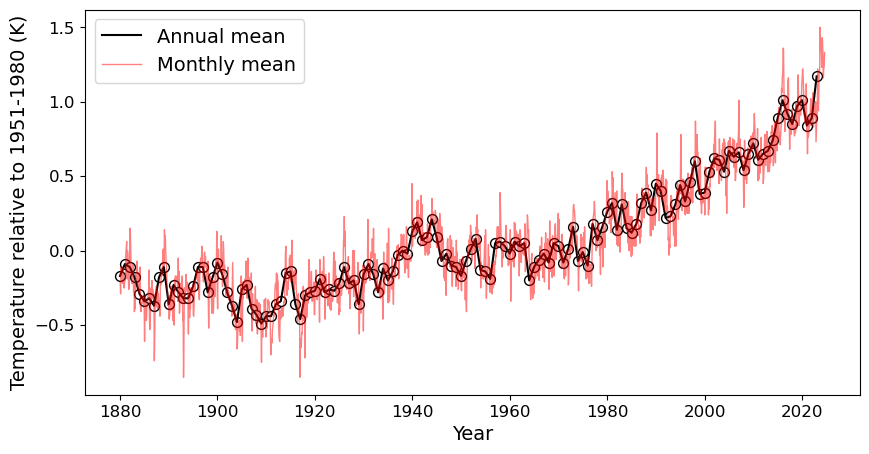

# Number of months of monthly data: 1736
# Number of months included in available anual data: 1728
# Month which should be left of 2024, included in monthly but not yet anual data (since it goes only till 2023): 8


In [147]:
time_monthly = np.arange(1880+1/24,2024+1/24+8*1/12,1/12)[:-1]
print(time_monthly.shape)
print(time_monthly)
print(nasa_mm.shape)
fig_mm, ax_mm = (None, None)
### YOUR CODE HERE
# Plot
fig_mm, ax_mm = plt.subplots(figsize=(10,5))
ax_mm.scatter(nasa['Year'],nasa['T'],s=50,color='white',marker=None,edgecolors='k')
ax_mm.plot(nasa['Year'],nasa['T'],label='Annual mean',color='k')
ax_mm.plot(time_monthly,nasa_mm,label='Monthly mean',color='r',linewidth=1,alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax_mm.set_ylabel('Temperature relative to 1951-1980 (K)',size=14)
ax_mm.set_xlabel('Year',size=14)
plt.legend(loc='upper left',fontsize=14)
plt.show()
# Check x-axis date logic
print("# Number of months of monthly data:", len(time_monthly))
print("# Number of months included in available anual data:", (len(nasa.Year))*12)
print("# Month which should be left of 2024, included in monthly but not yet anual data (since it goes only till 2023):", len(time_monthly)-(len(nasa.Year))*12)
###

**Task 1.5** Using `numpy`, calculate the standard deviations of both the annual and monthly mean time series, and hand the values over for evaluation to the already initialized variables `std_am` and `std_mm`, respectively. In addition, use `numpy` to find the value of the maximum monthly temperature anomaly (`T_max_mm`), as well as the corresponding year (`year_max`, as four-digit integer) and month (`month_max`). For the latter select the short-hand string notation from the defined list of months.

In [148]:
std_am = None
std_mm = None
T_max_mm = None
month_max = None
year_max = None
list_of_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [149]:
# YOUR CODE HERE
std_am = np.std(nasa['T'])
std_mm = np.std(nasa_mm)
T_max_mm = np.max(nasa_mm)
max_index = np.argmax(nasa_mm)
max_time = time_monthly[max_index]
year_max = int(max_time) # Get integer part of time to get year
month_max = list_of_months[int((max_time-year_max)*12)] # Get decimal part of time, multiply by 12 to get month index
print(std_am)
print(std_mm)
print(T_max_mm)
print("Following date is extracted from time_monthly value:",max_time)
print(year_max)
print(month_max)

0.37702291310499003
0.40428177
1.5
Following date is extracted from time_monthly value: 2023.7083333332027
2023
Sep


## Task 2: Predicting the temperature record

#### Background

Task 1 demonstrated that global surface temperatures since 1880 have seen significant yearly and monthly fluctuations, on top of an underlying positive trend. The positive trend has mainly been [attributed](https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter10_FINAL.pdf) to increasing atmospheric greenhouse gas concentrations, in particular carbon dioxide (CO$_2$). The shorter-term variability, in turn, is driven by a variety of weather and climate processes. Many of these processes are commonly subsumed in definitions of so-called "modes of climate variability", most famously the [El Niño Southern Oscillation (ENSO)](https://www.climate.gov/news-features/blogs/enso/what-el-ni%C3%B1o%E2%80%93southern-oscillation-enso-nutshell). The [North Atlantic Oscillation (NAO)](https://www.ncei.noaa.gov/access/monitoring/nao/), another climate mode, is especially relevant for European weather. These modes of climate variability are typically characterized in the form of indices, which are based on, e.g., sea surface temperatures across a certain region, or surface pressure gradients reflective of the state of the atmospheric circulation.

You will hear more about these mechanisms, including ENSO, in future lectures and exercises. Here, we will instead conduct a few first regression analyses to infer how well the historical changes in CO$_2$, the ENSO, and the NAO, but also in solar variability (measured through a [sunspot index](https://publi2-as.oma.be/record/247/files/paper_revised.pdf)), can explain and predict the historical temperature signal. Please be aware that such a regression analyses are at best indicative of the true causal drivers of change, which have been established with much more complex process-based models ("correlation does not imply causation").

### Loading and preparing the data

We have prepared the download and processing of the 1880-2023 time series of the CO$_2$, ENSO, NAO, and sunspot index data for you. Feel free to explore if you can follow those steps; note for example that the function `.values()` gives access to a `numpy` array representation of the columns of a ``pd.DataFrame()``. We also for the first time use the package `xarray`, which works on top of `numpy` and provides additional functionality for e.g. time-dependent data and for working with `netCDF` files. You will learn more about `xarray` in Worksheet 2.

After downloading and pre-processing the data, we also have a first look at those time series using `matplotlib`.

In [150]:
### Download and process CO2 data. This is from Input4MIPs, which is also used as input for the 6th international Climate Model Intercomparison Project (CMIP6). 
### We need to combine two scenarios.
### Again, we have already downloaded the data to the folder "data" for you
### but leave the comments to fetch updated data included here
# co2_am_file_1850_2014 = fetch_data("https://files.isimip.org/ISIMIP3b/InputData/climate/atmosphere_composition/co2/historical/co2_historical_annual_1850_2014.txt","co2_historical_annual_1850_2014.txt")
# co2_am_file_2015_now = fetch_data("https://files.isimip.org/ISIMIP3b/InputData/climate/atmosphere_composition/co2/ssp126/co2_ssp126_annual_2015_2100.txt","co2_ssp126_annual_2015_2100.txt")
co2_am_1850_2014 = pd.read_csv('./data/co2_historical_annual_1850_2014.txt',header=None,sep='\s+',names=['Year','CO2 (ppmv)'])
co2_am_2015_2023 = pd.read_csv('./data/co2_ssp126_annual_2015_2100.txt',header=None,sep='\s+',names=['Year','CO2 (ppmv)'])
co2_am_1880_2023 = pd.concat([co2_am_1850_2014[co2_am_1850_2014['Year'] >= 1880],co2_am_2015_2023[co2_am_2015_2023['Year'] < 2025]]).reset_index(drop=True)
### the CO2 data is only available at yearly temporal resolution, so we upsample the data according to the nearest timestamp to monthly frequency
co2_am_1880_2023.Year = pd.to_datetime(co2_am_1880_2023.Year,format='%Y')
co2_am_1880_2023 = co2_am_1880_2023.to_xarray()
co2_am_1880_2023 = co2_am_1880_2023.set_coords('Year').swap_dims({'index': 'Year'})
co2_mm_1880_2023 = co2_am_1880_2023.resample(Year='1M').nearest().to_dataframe()['CO2 (ppmv)'][:-1]
co2_mm_1880_2023 = np.array(co2_mm_1880_2023.values)[:,np.newaxis]
### Download the monthly NINO34 index (one of the indices representing ENSO).
### The data first comes in monthly columns for each year, and it orginally starts 10 years earlier
# nino34_raw_file = fetch_data("https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/nino34.long.anom.data","nino34.long.anom.data")
nino34_raw_mm = pd.read_csv('./data/nino34.long.anom.data',header=1,sep='\s+',skipfooter=8,engine='python',names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
nino34_raw_mm_1880_2023 = nino34_raw_mm.iloc[9:]
nino34_mm_1880_2023 = nino34_raw_mm_1880_2023.values.flatten()[:,np.newaxis]
### Now download and process the NAO index, using the definition following https://crudata.uea.ac.uk/cru/data/nao/
### More on the North Atlantic Oscillation (NAO) at https://crudata.uea.ac.uk/cru/data/nao/; again there is more data than we actually need here
# nao_raw_file = fetch_data("https://crudata.uea.ac.uk/cru/data/nao/nao.dat","nao.dat")
nao_raw_mm = pd.read_csv('./data/nao.dat',header=1,sep='\s+',names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Annual mean'])
nao_raw_mm = nao_raw_mm.drop(columns='Annual mean')
nao_raw_mm_1880_2023 = nao_raw_mm.iloc[57:-1]
nao_mm_1880_2023 = nao_raw_mm_1880_2023.values.flatten()[:,np.newaxis]
### and, finally, the sunspot index
# sunspot_raw_file = fetch_data("https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/sunspot.long.data","sunspot.long.data")
sunspot_raw_mm = pd.read_csv('./data/sunspot.long.data',header=1,sep='\s+',skipfooter=9,engine='python',names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
sunspot_raw_mm_1880_2023 = sunspot_raw_mm.iloc[130:]
sunspot_mm_1880_2023 = sunspot_raw_mm_1880_2023.values.flatten()[:-12,np.newaxis]
### we won't look into 2024 data here, because not all indices were available for 2024 yet...
### we can use Python indexing to cut off the last nine months (January to August 2024) from the time array
time_monthly_1880_2023 = time_monthly[:-8]

C:\Users\merti\anaconda3\envs\ml-climate\lib\site-packages\xarray\groupers.py:392: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


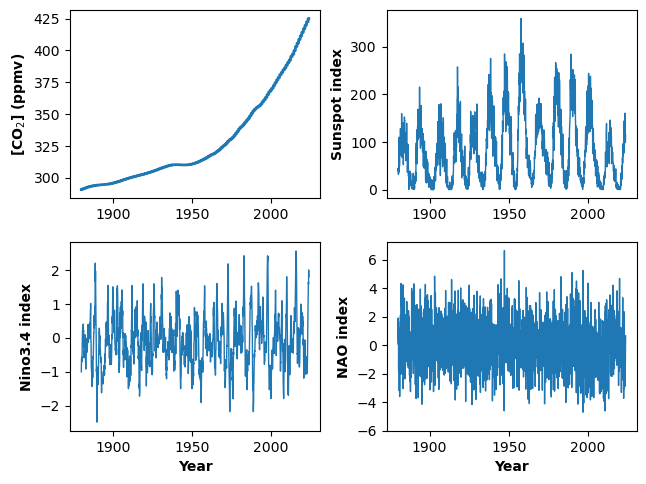

In [151]:
### now we visualize the four time series using matplotlib
fig, axs = plt.subplots(2, 2)
plt.tight_layout(w_pad=1.7)
axs[0,0].plot(time_monthly_1880_2023,co2_mm_1880_2023,linewidth=2)
axs[0,0].set_ylabel('[CO$_2$] (ppmv)',fontweight='bold')
axs[0,1].plot(time_monthly_1880_2023,sunspot_mm_1880_2023,linewidth=1)
axs[0,1].set_ylabel('Sunspot index',fontweight='bold')
axs[1,0].plot(time_monthly_1880_2023,nino34_mm_1880_2023,linewidth=1)
axs[1,0].set_ylabel('Nino3.4 index',fontweight='bold')
axs[1,0].set_xlabel('Year',fontweight='bold')
axs[1,1].plot(time_monthly_1880_2023,nao_mm_1880_2023,linewidth=1)
axs[1,1].set_ylabel('NAO index',fontweight='bold')
axs[1,1].set_xlabel('Year',fontweight='bold')
axs[1,1].set_yticks(np.arange(-6,8,2))
plt.show()

### First machine learning regressions

Clearly, the four variables/indices show different trends and periodicities, which might help to explain different timescales of variability in the NASA monthly temperature data.

So, let's formulate a regression problem in which we try to predict global mean surface temperature, *T*, from the evolution of the concentration of atmospheric carbon dioxide *[CO$_2$]*, the sunspot index *S*, the ENSO index *Nino3.4*, and the *NAO* index. As will often be the case in machine learning, we thus aim to learn a predictive function *f*
over time *t*
$$
T (t) = f\bigl([\text{CO}_2], \text{S}, \text{Nino3.4}, \text{NAO}\bigr)(t) + \epsilon
$$
of the general form
$$
y(t) = f(X(t)) + \epsilon
$$
expressing the dependency of the predictand *y* on multiple predictors *X*.

To fit this function, we will next compare one-dimensional linear regression (based on CO$_2$ as the only predictor), multiple linear regression, random forest regression, and a small neural network. This will be your first encounter with the `scikit-learn` package in Python, which provides access to a large number of easy-to-use and efficient machine learning functions, see also its documentation [here](https://scikit-learn.org/stable/).

So, first let's concatenate all predictors into a predictor `numpy` array `X_all` of shape (number months, number predictor dimensions) and re-write the NASA monthly temperature data into an array *y*, removing the months for the year 2024. 

Let's also make sure the dimensions match in time.

In [152]:
X_all = np.concatenate((co2_mm_1880_2023[:,:],sunspot_mm_1880_2023[:,:],nino34_mm_1880_2023[:,:],nao_mm_1880_2023[:,:]),axis=1)
print(X_all.shape)
y = nasa_mm[:-8]
print(y.shape)

(1728, 4)
(1728,)


Now we fit multiple linear regression, random forest regression, and a small neural network function on this *X* and *y* data. The corresponding regressor functions from `scikit-learn` were imported at the beginning of this notebook. For their documentation see [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [RandomForestRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and [MLPRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html). The random forests method is a non-linear regression algorithm that thanks to `scikit-learn` is easy to implement yet typically a powerful predictive tool. You will learn much more about random forests when we discuss ensemble methods. The MLP in the neural network regressor object stands for Multi-Layer Perceptron and allows for the straightforward creation and training of feedforward neural networks. For now, 
there is no need for you to understand the details behind this code yet. 

However, from the next cell, you will already be able to deduce the general logic of fitting regression functions with `scikit-learn`:

1. A regression object is `.fit()` on a pair of `X` and `y` data. Note that the predictor array `X` must have a second dimension, even if it is just a single dummy dimension which would not be required for a single time series, e.g. (1000,1) or (3000,1). If `X` for example had shape (1000,) you could use the `np.newaxis` command to add a dummy dimension, i.e. `X[:,np.newaxis]`. We also used `np.newaxis` in the preparation of the predictor data above. 
2. Once the regression object has been fit, you can use it to `.predict()` new y-values.

There are many useful functions to evaluate the prediction skill. Here we will measure prediction error with the already imported `mean_squared_error()` function from `sklearn.metrics`.

**Task 2.1** Using the same type of `LinearRegression()` object as for the Multiple Linear Regression (MLR), fit a fourth regression function that only includes the CO$_2$ evolution as the linear predictor. Just as for the other three regression functions below calculate and print the mean squared error on its own training data.

*Hint*: CO$_2$ is the first predictor in `X_all`.

In [153]:
### Multiple linear regression
MLR = LinearRegression()
MLR.fit(X_all,y)
y_pred_MLR = MLR.predict(X_all)
mse_MLR = mean_squared_error(y,y_pred_MLR)
print('MLR error on training data: ',round(mse_MLR,5))

### Random forest regression
RFR = RandomForestRegressor(random_state=10)
RFR.fit(X_all,y)
y_pred_RFR = RFR.predict(X_all)
mse_RFR = mean_squared_error(y,y_pred_RFR)
print('RFR error on training data: ',round(mse_RFR,5))

### Neural network
NN = MLPRegressor(hidden_layer_sizes=(100,100), random_state=1, max_iter=2000,activation='tanh',shuffle=False,alpha=0.0,solver='lbfgs')
NN.fit(X_all, y)
y_pred_NN = NN.predict(X_all)
mse_NN = mean_squared_error(y,y_pred_NN)
print('NN error on training data: ',round(mse_NN,5))

### One-dimensional linear regression
LR = LinearRegression()
mse_LR = None

# YOUR CODE HERE
LR.fit(X_all[:,0].reshape(-1,1),y)
y_pred_LR = LR.predict(X_all[:,0].reshape(-1,1))
mse_LR = mean_squared_error(y,y_pred_LR)
print('LR error on training data: ',round(mse_LR,5))

MLR error on training data:  0.02251
RFR error on training data:  0.002
NN error on training data:  0.02258
LR error on training data:  0.02597


**Task 2.2** Which of the four regression models fits the training data best, which one worst? Select the fitting strings from the list `models` and assign them to the two variables below.

In [154]:
models = ['MLR', 'RFR', 'NN', 'LR']
best_fitting_model_training = None
worst_fitting_model_training = None

# YOUR CODE HERE
# Assign best and worst fitting model, MSE nearest to 0 is best, see Task 2.1 for MSE values
best_fitting_model_training = 'RFR' # Random Forest Regression
worst_fitting_model_training = 'LR' # Linear Regression

**Task 2.3** Now create a `matplotlib` time series plot showing the true NASA 1880-2023 monthly temperature data, 
as well as the four predicted time series by the regression functions (free style, your design). However, make sure to add a figure legend with informative labels.

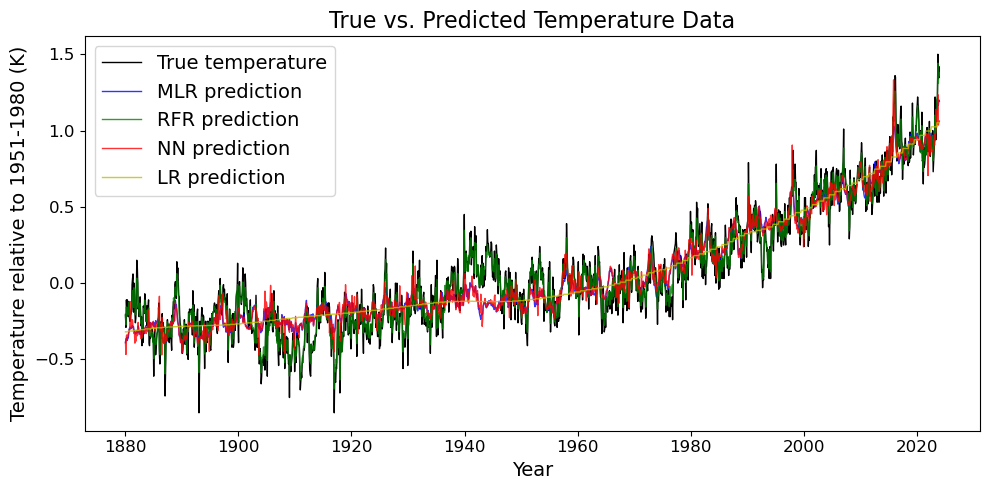

In [155]:
fig, ax = plt.subplots(figsize=(10,5))
# YOUR CODE HERE
ax.plot(time_monthly_1880_2023,y,label='True temperature',color='k', linewidth=1)
ax.plot(time_monthly_1880_2023,y_pred_MLR,label='MLR prediction',color='b',linewidth=1, alpha=0.8)
ax.plot(time_monthly_1880_2023,y_pred_RFR,label='RFR prediction',color='g', linewidth=1, alpha=0.8)
ax.plot(time_monthly_1880_2023,y_pred_NN,label='NN prediction',color='r', linewidth=1, alpha=0.8)
ax.plot(time_monthly_1880_2023,y_pred_LR,label='LR prediction',color='y', linewidth=1, alpha=0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel('Temperature relative to 1951-1980 (K)',size=14)
ax.set_xlabel('Year',size=14)
plt.legend(loc='upper left',fontsize=14)
plt.title('True vs. Predicted Temperature Data', fontsize=16)
plt.tight_layout()
plt.show()

**Task 2.4** What is specific to the predictions of the one-dimensional linear regression you carried out, compared to the predictions by the other three regression models?

In [156]:
answer_LR = ""
# YOUR CODE HERE
answer_LR = "The one-dimensional linear regression model only uses the CO2 evolution as a predictor, while the other three models use all four predictors (CO2, Sunspot index, Nino3.4 index, NAO index) to predict the temperature. The one-dimensional linear regression model is therefore the simplest model but also has the least amount of information for prediction. The other three models are therefore more complex and have more information to predict the temperature, which makes them more accurate. This is not only reflected in the mean squared error of the models, where the one-dimensional linear regression model has the highest mean squared error compared to the other three models, thus it performs worst, but also in the plot. There, one can see that the one-dimensional linear regression model has a really smooth development with a clear trend over time without any peaks or troughs, while the other three models have significantly more of them in the prediction, which is also more similar to the true temperature data and way more detailed."

### Training vs. Test data

Intuitively, you might have wondered if predicting on the same data as used for fitting is such a sensible thing to do!

Indeed, predicting on what statisticians refer to as *training data* is of little value. Especially highly flexible machine learning functions can always fit the training data very well. The key question is if the function learned has ***generalizable*** predictive skill on y, i.e. if confronted with new inputs 'X' that were not part of the training data.

To test generalization skill, machine learners usually split the available data into representative subsets of *training* and *test* data. The algorithm, in various configurations, is then trained first, but its true predictive skill can only be measured on the held-out test data. You will learn more about this idea in the lectures and in future worksheets.

Here, let's run a few practical tests first to see if the functions that fitted the data above best, would also perform best on held-out test data.

Since we cannot produce a second observational record, we need to start again from scratch. However, this time around we will split the predictor and predictand data into training and test sets, i.e. `X_train` and `X_test`, as well as `y_train` and `y_test`. Specifically, we will hold out test data for the 1980-2000 period and use all remaining years for training. Afterwards, we will again compare the mean squared error, but this time for predictions on the 1980-2000 data not seen during training.

Let's see what this will bring! Maybe a surprise?

In [157]:
### train on 1880-1979, plus 2001-2023
### then predict on 1980-2000 period
i=100
j=121
idx_test = np.arange(i*12,j*12)
print(time_monthly_1880_2023[idx_test][0:3])
print(time_monthly_1880_2023[idx_test][-3:])
### define training and test data using these indices
X_train = np.delete(X_all[:,:],idx_test,axis=0)
y_train = np.delete(y,idx_test)
X_test = X_all[i*12:j*12,:]
y_test = y[i*12:j*12]
### Multiple linear regression
MLR_surprise = LinearRegression()
MLR_surprise.fit(X_train,y_train)
y_hat_MLR_surprise = MLR_surprise.predict(X_test)
mse_MLR_surprise = mean_squared_error(y_test, y_hat_MLR_surprise)
print('MLR error on test data: ',round(mse_MLR_surprise,5))
      
### Random forest regression
RFR_surprise = RandomForestRegressor(random_state=10)
RFR_surprise.fit(X_train,y_train)
y_hat_RFR_surprise = RFR_surprise.predict(X_test)
mse_RFR_surprise = mean_squared_error(y_test,y_hat_RFR_surprise)
print('RFR error on test data: ',round(mse_RFR_surprise,5))

### Neural network
NN_surprise = MLPRegressor(hidden_layer_sizes=(100,100), random_state=1, max_iter=2000, activation='tanh',shuffle=False,alpha=0.0,solver='lbfgs')
NN_surprise.fit(X_train, y_train)
y_hat_NN_surprise = NN_surprise.predict(X_test)
mse_NN_surprise = mean_squared_error(y_test,y_hat_NN_surprise)
print('NN error on test data: ',round(mse_NN_surprise,5))

[1980.04166667 1980.125      1980.20833333]
[2000.79166667 2000.875      2000.95833333]
MLR error on test data:  0.02113
RFR error on test data:  0.05582
NN error on test data:  0.02357


**Task 2.5** What is the best-performing model on the 1980-2000 test data, which one performs worst? Select the fitting string from the list `models` and write it to the two variables below.

In [158]:
models = ['MLR', 'RFR', 'NN']
best_fitting_model_test = None
worst_fitting_model_test = None

# YOUR CODE HERE
# Assign best and worst fitting model, MSE nearest to 0 is best, see Task 2.4 for MSE values
best_fitting_model_test = 'MLR' # Multiple Linear Regression
worst_fitting_model_test = 'RFR' # Random Forest Regression

**Task 2.6** How do you explain this result? What would be your strategy, across all three models, to maximize your predictive skill on the test data? How could you achieve this goal?

*Hint*: see what happens if you change some of the parameters in the machine learning regression functions. If necessary look up additional parameters in their Python documentations. Does changing the parameters affect the results a lot?

In [159]:
answer_testdata= ""
# YOUR CODE HERE
answer_testdata = "The best-performing model on the 1980-2000 test data is the Multiple Linear Regression (MLR) model, while the worst-performing model is the Random Forest Regression (RFR) model. Whereas before on train data RFR worked best, now on test data MLR works best. This is because the RFR model is more complex and is able to recognize little fluctuations. However, this complexity can also lead to overfitting, which means that the model is too closely fitted to the training data, performs well on them and therefore does not generalize well to new data. The MLR model in contrast is simpler, which makes it less accurate on the training data but also less prone to overfitting. This is why the MLR model works better on the test data. To generally maximize predictive skill on the test data, I would try to find a good trade-of between model complexity and performance. One step for it could be dimensionality reduction, which could most simply be done via PCA and also checking the correlation of given features used, dropping or merging some, to reduce the complexity and dimension. Added to that, since there are many parameters for each model, I would generally try to find the best combination for each model by using a grid search or random search, doing a hyperparameter optimization for the whole model selection with a selected parameter range. These parameters could affect the model performance in combination with given data a lot, for example by reducing the number of hidden layers in the neural network model used, adding a dropout layer to the NN for generalization, changing the activation function, or changing the number of trees or maximum depth in the random forest model, to name some of the most important ones. Combined with that typically I would also use cross-validation to evaluate the model performance on different train and test data splits, to make sure that the model generalizes well to new data. Based on these results I would then choose the model with the best average performance over all splits (rolling window splits typically, since time series)."

### Extrapolation

Finally, let's consider another peculiarity about using machine learning in climate science: the system we study is non-stationary.

**Task 2.7** Write your own code (of course, your are allowed to also re-use code from above) to train MLR, RFR, and NN models on data for
the years 1880-2000 and then predict the temperature anomalies for the remaining years 2001-2023. 

**Task 2.8** Visualize the three predicted time series for the years 2001-2022, similar to the figure produced in Task 2.3, next to the actual NASA temperature data for that period.

**Task 2.9** What do you observe? How do you explain these results?

In [160]:
### Task 2.7 - write your own code
# YOUR CODE HERE
# Train on 1880-2000
# Then predict on 2001-2023 period
i_expl=121
j_expl=144
idx_test_expl = np.arange(i_expl*12,j_expl*12) # Scale to months
# Check if indices are correct
print(time_monthly_1880_2023[idx_test_expl][:3]) # Check first three months of test index (should be 2001)
print(time_monthly_1880_2023[idx_test_expl][-3:]) # Check last three months of test index (should be 2023)
print(time_monthly_1880_2023[-3:]) # Check last three months of whole time series, if any is left out in test index
# Define training and test data using these indices
X_train_expl = np.delete(X_all[:,:],idx_test_expl,axis=0)
y_train_expl = np.delete(y,idx_test_expl)
X_test_expl = X_all[i_expl*12:j_expl*12,:]
y_test_expl = y[i_expl*12:j_expl*12]
# MLR
MLR_extrapolation = LinearRegression()
MLR_extrapolation.fit(X_train_expl,y_train_expl)
y_hat_MLR_extrapolation = MLR_extrapolation.predict(X_test_expl) # Predict temperature anomalies for 2001-2023 using MLR model
mse_MLR_extrapolation = mean_squared_error(y_test_expl, y_hat_MLR_extrapolation)
print('MLR error on test data: ',round(mse_MLR_extrapolation,5))
# RFR
RFR_extrapolation = RandomForestRegressor(random_state=10)
RFR_extrapolation.fit(X_train_expl,y_train_expl)
y_hat_RFR_extrapolation = RFR_extrapolation.predict(X_test_expl) # Predict temperature anomalies for 2001-2023 using RFR model
mse_RFR_extrapolation = mean_squared_error(y_test_expl,y_hat_RFR_extrapolation)
print('RFR error on test data: ',round(mse_RFR_extrapolation,5))
# NN
NN_extrapolation = MLPRegressor(hidden_layer_sizes=(100,100), random_state=1, max_iter=3000, activation='tanh',shuffle=False,alpha=0.0,solver='lbfgs')
NN_extrapolation.fit(X_train_expl,y_train_expl)
y_hat_NN_extrapolation = NN_extrapolation.predict(X_test_expl) # Predict temperature anomalies for 2001-2023 using NN model
mse_NN_extrapolation = mean_squared_error(y_test_expl,y_hat_NN_extrapolation)
print('NN error on test data: ',round(mse_NN_extrapolation,5))

[2001.04166667 2001.125      2001.20833333]
[2023.79166667 2023.875      2023.95833333]
[2023.79166667 2023.875      2023.95833333]
MLR error on test data:  0.01816
RFR error on test data:  0.14308
NN error on test data:  0.04218


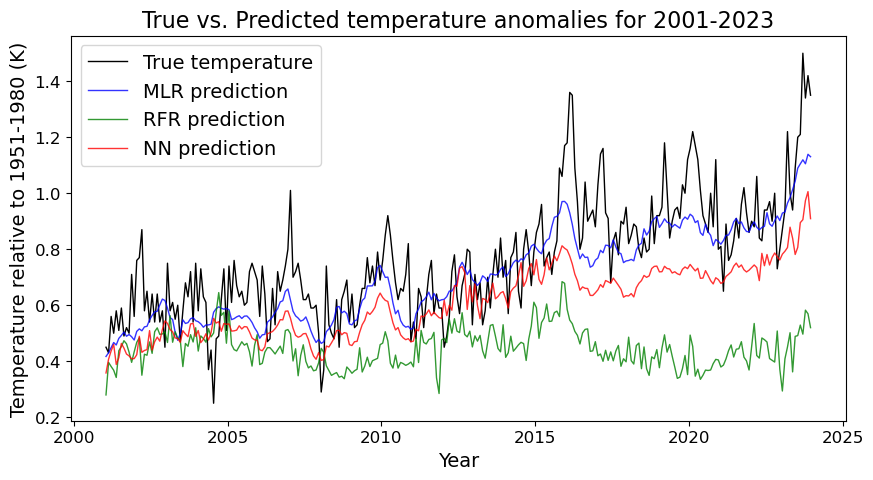

In [161]:
### Task 2.8 - write your own matplotlib code
# Visualize the three predicted time series for the years 2001-2022, similar to the figure produced in Task 2.3, next to the actual NASA temperature data for that period
fig, ax = plt.subplots(figsize=(10,5))
# YOUR CODE HERE
ax.plot(time_monthly_1880_2023[i_expl*12:j_expl*12],y_test_expl,label='True temperature',color='k', linewidth=1)
ax.plot(time_monthly_1880_2023[i_expl*12:j_expl*12],y_hat_MLR_extrapolation,label='MLR prediction',color='b',linewidth=1, alpha=0.8)
ax.plot(time_monthly_1880_2023[i_expl*12:j_expl*12],y_hat_RFR_extrapolation,label='RFR prediction',color='g', linewidth=1, alpha=0.8)
ax.plot(time_monthly_1880_2023[i_expl*12:j_expl*12],y_hat_NN_extrapolation,label='NN prediction',color='r', linewidth=1, alpha=0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel('Temperature relative to 1951-1980 (K)',size=14)
ax.set_xlabel('Year',size=14)
plt.legend(loc='upper left',fontsize=14)
plt.title('True vs. Predicted temperature anomalies for 2001-2023',size=16)
plt.show()

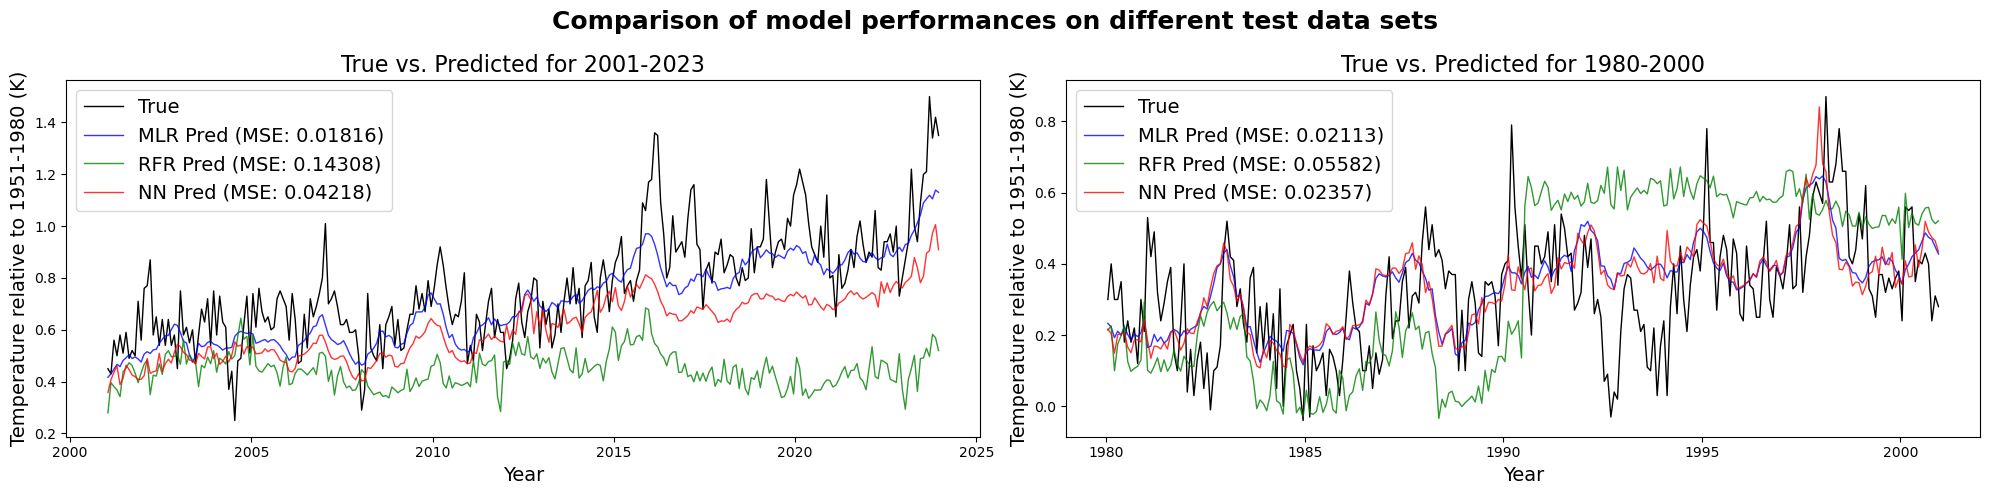

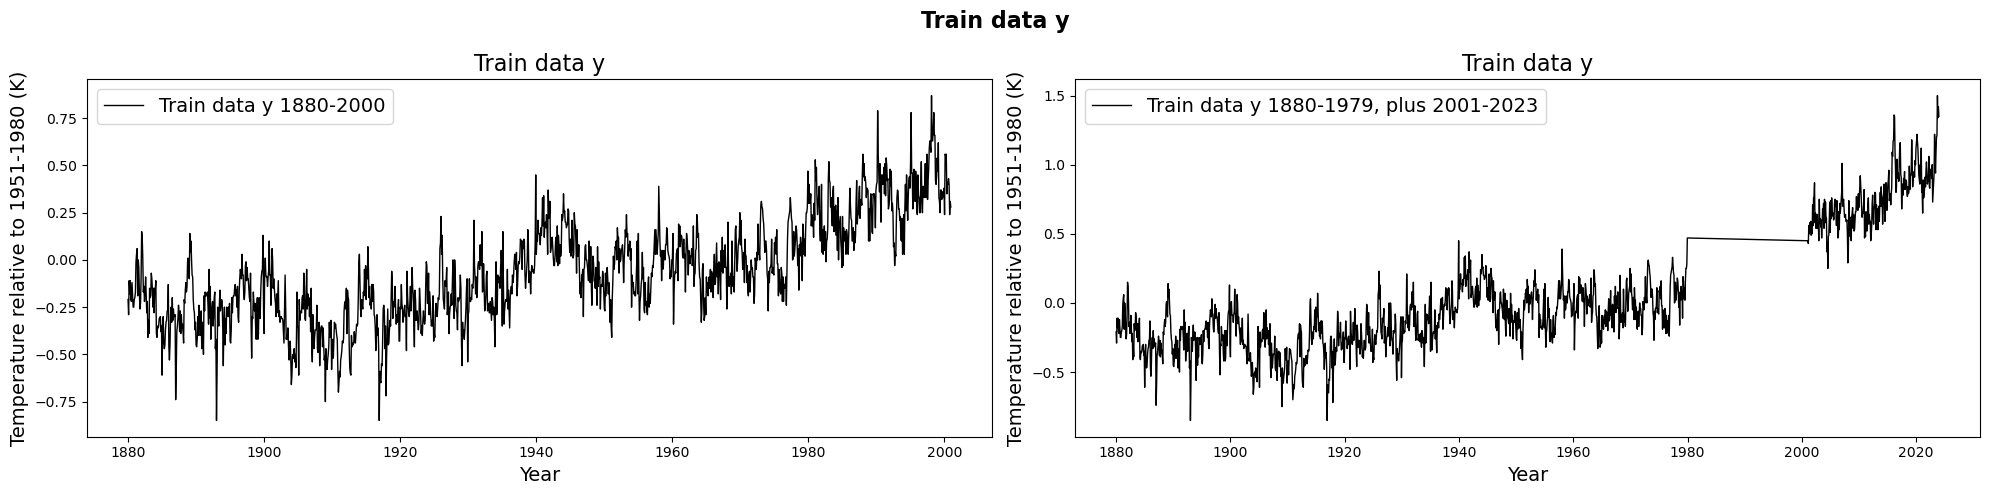

In [162]:
### Task 2.9 - what do you observe and how do you explain it
answer_extrapolation = ""
# YOUR CODE HERE
# Plot comparison of model performances on the different test data sets
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].plot(time_monthly_1880_2023[i_expl*12:j_expl*12],y_test_expl,label='True',color='k', linewidth=1)
axes[0].plot(time_monthly_1880_2023[i_expl*12:j_expl*12],y_hat_MLR_extrapolation,label=f'MLR Pred (MSE: {round(mse_MLR_extrapolation,5)})',color='b',linewidth=1, alpha=0.8)
axes[0].plot(time_monthly_1880_2023[i_expl*12:j_expl*12],y_hat_RFR_extrapolation,label=f'RFR Pred (MSE: {round(mse_RFR_extrapolation,5)})',color='g', linewidth=1, alpha=0.8)
axes[0].plot(time_monthly_1880_2023[i_expl*12:j_expl*12],y_hat_NN_extrapolation,label=f'NN Pred (MSE: {round(mse_NN_extrapolation,5)})',color='r', linewidth=1, alpha=0.8)
axes[0].set_title('True vs. Predicted for 2001-2023',size=16)

axes[1].plot(time_monthly_1880_2023[i*12:j*12],y_test,label='True',color='k', linewidth=1)
axes[1].plot(time_monthly_1880_2023[i*12:j*12],y_hat_MLR_surprise,label=f'MLR Pred (MSE: {round(mse_MLR_surprise,5)})',color='b',linewidth=1, alpha=0.8)
axes[1].plot(time_monthly_1880_2023[i*12:j*12],y_hat_RFR_surprise,label=f'RFR Pred (MSE: {round(mse_RFR_surprise,5)})',color='g', linewidth=1, alpha=0.8)
axes[1].plot(time_monthly_1880_2023[i*12:j*12],y_hat_NN_surprise,label=f'NN Pred (MSE: {round(mse_NN_surprise,5)})',color='r', linewidth=1, alpha=0.8)
axes[1].set_title('True vs. Predicted for 1980-2000',size=16)

for ax in axes:
    ax.set_xlabel('Year',size=14)
    ax.set_ylabel('Temperature relative to 1951-1980 (K)',size=14)
    ax.legend(loc='upper left',fontsize=14)

fig.suptitle('Comparison of model performances on different test data sets',size=18, fontweight='bold')
plt.tight_layout()
plt.show()

# Plot train data target to see if train data target is any different from the test data target and also the other train data target
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].plot(time_monthly_1880_2023[:i_expl*12],y_train_expl,label='Train data y 1880-2000',color='k', linewidth=1)
axes[0].set_title('Train data y',size=16)
temp = np.delete(time_monthly_1880_2023, idx_test)
axes[1].plot(temp,y_train,label='Train data y 1880-1979, plus 2001-2023',color='k', linewidth=1)
axes[1].set_title('Train data y',size=16)

for ax in axes:
    ax.set_ylabel('Temperature relative to 1951-1980 (K)',size=14)
    ax.set_xlabel('Year',size=14)
    ax.legend(loc='upper left',fontsize=14)

plt.legend(loc='upper left',fontsize=14)
fig.suptitle('Train data y',size=16, fontweight='bold')
plt.tight_layout()
plt.show()

answer_extrapolation = "The Multiple Linear Regression (MLR) model performs best on the test data for the years 2001-2023, while the Random Forest Regression (RFR) model performs worst. This is the same result as for the test data for the years 1980-2000 as can be seen in the Comparison plots including the MSE values. The explanation for it is the same as before, that the MLR is less complex and therefore less prone to overfitting, which makes it more accurate on new test data."

In [163]:
### In the following, the public part of the automized tests
assert time_series_20year_rm is not None
assert rm_value_2010 is not None
assert len(answer_rolling_mean) > 0

In [164]:
assert std_am is not None
assert std_mm is not None
assert T_max_mm is not None
assert month_max is not None
assert year_max is not None

In [165]:
assert mse_LR is not None
assert best_fitting_model_training is not None
assert worst_fitting_model_training is not None
assert len(answer_LR) > 0

In [166]:
assert best_fitting_model_test is not None
assert worst_fitting_model_test is not None
assert len(answer_testdata) > 0

In [167]:
assert len(answer_extrapolation) > 0
